In [191]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
import scipy.stats as stats

In [192]:
def calculate_x(pd:float) -> bool: 
    return 1 if random.random() < pd else 0 

def calculate_q(q:float) -> bool: 
    return 1 if random.random() < q else 0 

In [193]:
def bank(EAD: np.array, LGD: float, PD):
    length = len(EAD)
    pdArray = np.array(list(map(calculate_x, np.ones(length) * PD)))
    Li = EAD * LGD * pdArray
    Ln = Li.sum()

    return Ln

# Question 1: Data Analysis

### Create the method to do the first two points of the question

In [194]:
def q1(name:str, EAD:np.array, LGD:float, PD, length=1000):
    # sample: 
    Ln = np.array([bank(EAD, LGD, PD) for _ in range(length)])

    # Plot the histogram 
    plt.hist(Ln, bins=30, edgecolor='k') # TODO: make this sqrt(length) 
    plt.title(f'Histogram of Portfolio Loss of {name}')
    plt.xlabel('Loss')
    plt.ylabel('Frequency')
    plt.show()

    # Provide the average, minimum and maximum of the sampled values: 
    print(f"""[i] Practical Values
            Average: {np.mean(Ln)}
            Minimum: {Ln.min()}
            Maximum: {Ln.max()}
    """)

    # Theoretical Values: 
    print(f"""[i] Theoretical Values
            Expected: {sum(EAD * LGD * PD)}
            minimum: 0 
            maximum: {sum(EAD * LGD)}""")
    # TODO: I'm not sure about the validity of the minimum and maximum, I just used logic. Check if this is correct. 
    


In [195]:
# we can calculate the theoretical expected by replacing X_i with PD_i since expected is the sum of the variable * its probability for all possible outcomes
# Theoretical minimum would be 0 since every X would be 0.
# Theoretical maximum would be the case where all X value would be 1.

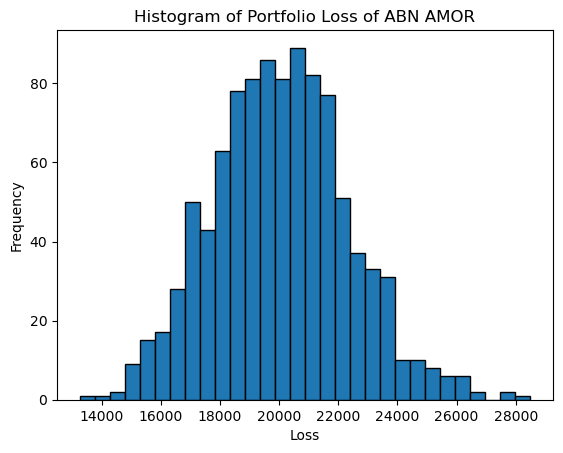

[i] Practical Values
            Average: 20069.75
            Minimum: 13250.0
            Maximum: 28500.0
    
[i] Theoretical Values
            Expected: 20000.0
            minimum: 0 
            maximum: 2000000.0


In [196]:
# ABN AMOR
def q1_abn_amor(): 

    EAD = np.ones(8000) * 1000
    LGD = 0.25 
    PD = 0.01 

    q1("ABN AMOR", EAD, LGD, PD)

q1_abn_amor()

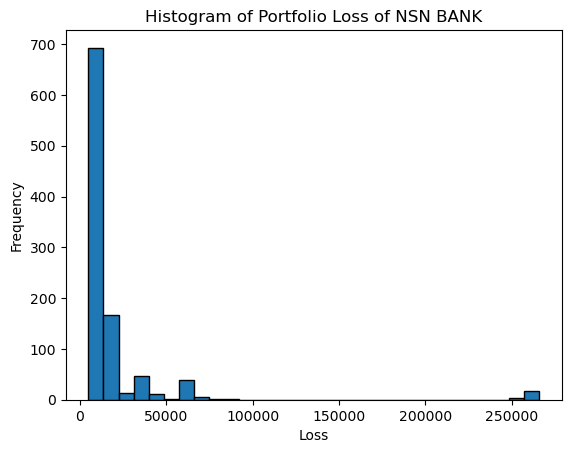

[i] Practical Values
            Average: 20498.0
            Minimum: 5000.0
            Maximum: 266000.0
    
[i] Theoretical Values
            Expected: 20000.0
            minimum: 0 
            maximum: 1000000.0


In [197]:
# NSN BANK
def q1_nsn_bank(): 

    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = 0.02

    q1("NSN BANK", EAD, LGD, PD)

q1_nsn_bank()

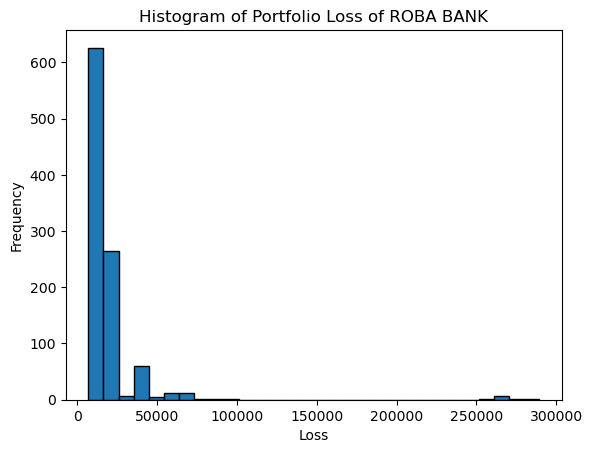

[i] Practical Values
            Average: 20703.5
            Minimum: 7000.0
            Maximum: 289500.0
    
[i] Theoretical Values
            Expected: 20000.0
            minimum: 0 
            maximum: 1000000.0


In [198]:
# ROBA BANK
def q1_roba_bank(): 

    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = np.array([0.0275] * 1000 + [0.02] * 10 + [0.0175] * 4 + [0.015] * 2 + [0.008] * 1)

    q1("ROBA BANK", EAD, LGD, PD)
q1_roba_bank()

# Question 2

ABN AMOR
EL:20231.25
UL:14524.2887
VaR Alpha:2750.0
EC Alpha:201.0048
Tail Condition Expectation:20432.2548

NSN BANK
EL:18111.0
UL:31559.9775
VaR Alpha:1000.0
EC Alpha:264.1269
Tail Condition Expectation:18375.1269

ROBA BANK
EL:20619.5
UL:30332.4244
VaR Alpha:2000.0
EC Alpha:254.3602
Tail Condition Expectation:20873.8602



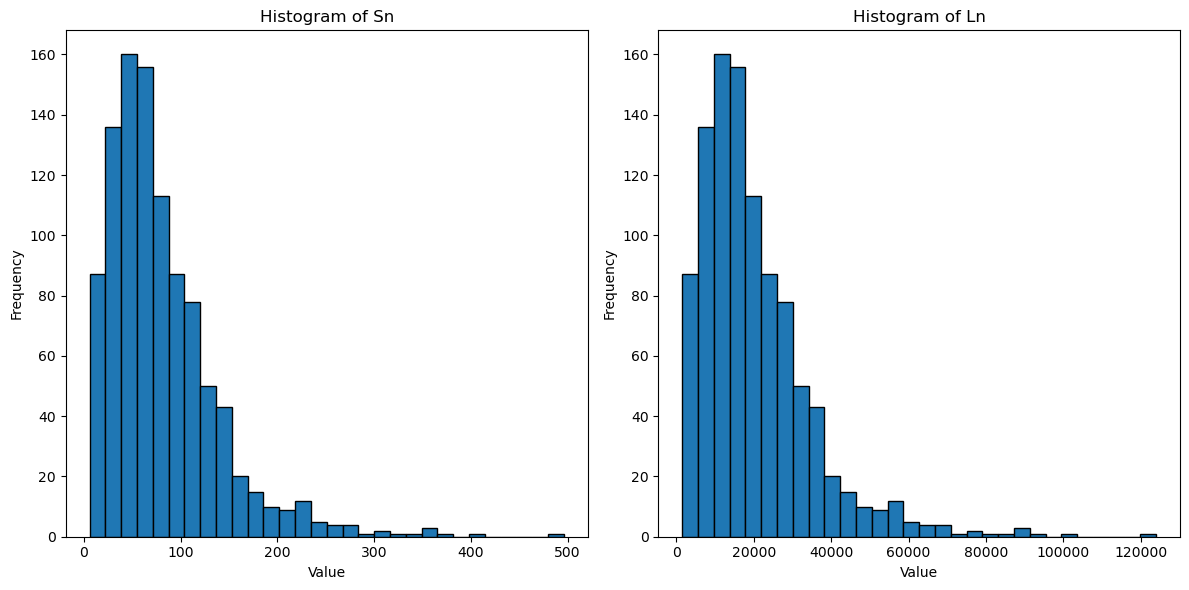

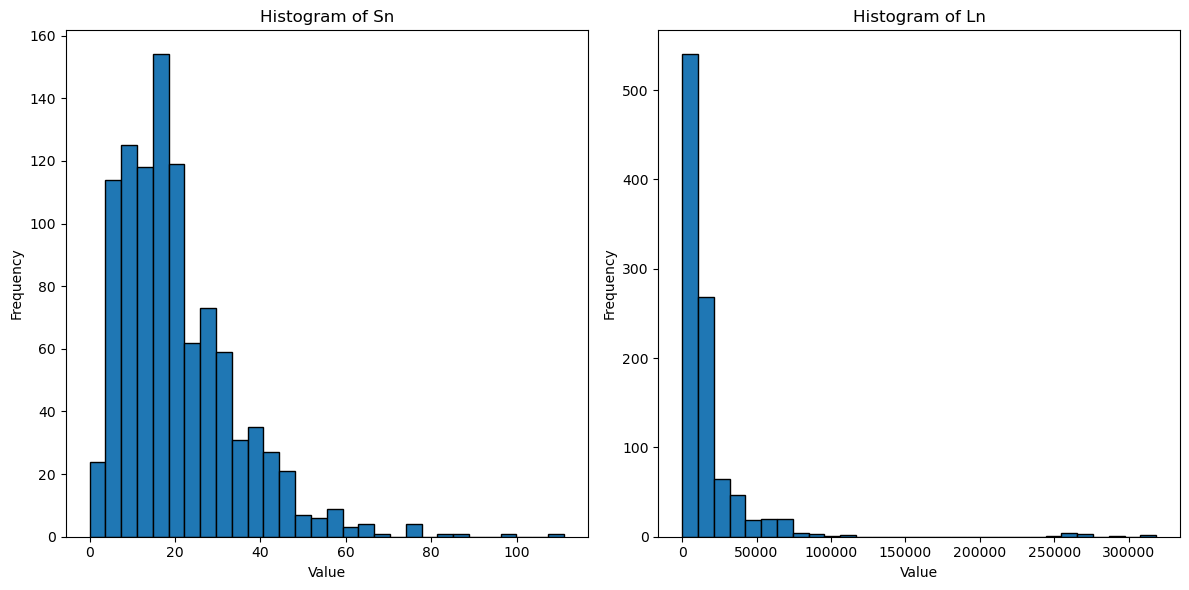

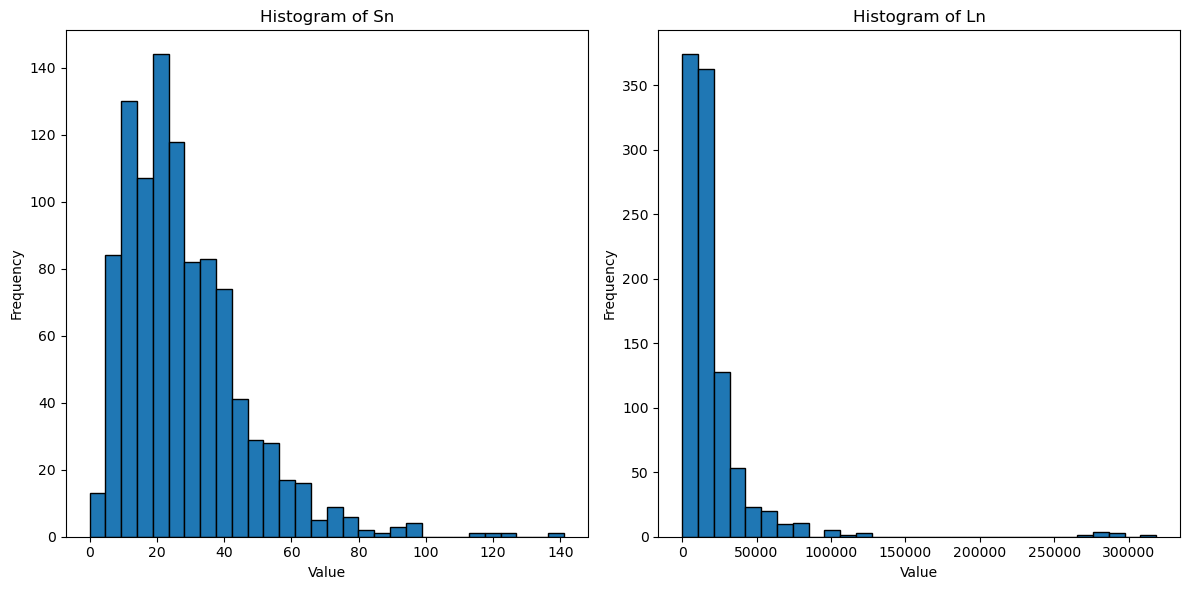

In [199]:
# def calculate_pd(PD, R:float=0.25, Y:float=stats.norm(loc=0, scale=1).rvs(1)): 
#     return stats.norm.cdf((stats.norm.ppf(PD) - (R * Y)) / (np.sqrt(1 - (R**2))))

class question2(): 
    def __init__(self, n=1000):
        self.Y = stats.norm(loc=0, scale=1).rvs(n) 
        self.n = n 

    def calculate_pd(self, PD, R:float=0.25, Y:float=stats.norm(loc=0, scale=1).rvs(1)): 
        return stats.norm.cdf((stats.norm.ppf(PD) - (R * Y)) / (np.sqrt(1 - (R**2))))
    
    def run(self, EAD: np.array, LGD: float, PD, run_index:int):
        
        if type(PD) == float: 
            PD = self.calculate_pd(PD, Y=self.Y[run_index])
        else: 
            PD = np.array([self.calculate_pd(i, Y=self.Y[run_index]) for i in PD])

        x_array = np.array(list(map(calculate_x, np.ones(len(EAD)) * PD)))
        Sn = x_array.sum()        
        Ln = np.sum(EAD * LGD * x_array)

        return Sn, Ln 
    
    def simulate(self, EAD, LGD, PD):
        # 2 - run the simulation
        result = [self.run(EAD, LGD, PD, i) for i in range(self.n)]
        Sn = np.array([i[0] for i in result])
        Ln = np.array([i[1] for i in result])
        return Sn, Ln 
    
    def distribution_calcuations(self, Sn:np.ndarray, Ln:np.ndarray): 
        # Create a figure and set up subplots (1 row, 2 columns)
        plt.figure(figsize=(12, 6))

        # Plot histogram fo`r Sn in the first subplot (position 1)
        plt.subplot(1, 2, 1)
        plt.hist(Sn, bins=30, edgecolor='black')
        plt.title('Histogram of Sn')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

        # Plot histogram for Ln in the second subplot (position 2)
        plt.subplot(1, 2, 2)
        plt.hist(Ln, bins=30, edgecolor='black')
        plt.title('Histogram of Ln')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

        # Adjust layout for better spacing
        plt.tight_layout()

    def risk_measures_calculations(self, Ln:np.ndarray, alpha=0.99): 
        EL = Ln.mean() 
        UL = np.sqrt(Ln.var()) 
        VaR_alpha = np.percentile(Ln, (1 - alpha) * 100)
        # Expected Shortfall (Conditional VaR) as Economic Capital
        EC_alpha = np.mean([i for i in Ln if i > VaR_alpha]) - EL
        # EC_alpha = VaR_alpha - EL 
        tail_condition_expectation = np.mean([i for i in Ln if i > VaR_alpha]) 

        print(f"EL:{round(EL,4)}")
        print(f"UL:{round(UL,4)}")
        print(f"VaR Alpha:{round(VaR_alpha,4)}")
        print(f"EC Alpha:{round(EC_alpha,4)}")
        print(f"Tail Condition Expectation:{round(tail_condition_expectation,4)}")

    def all_in_one(self, EAD, LGD, PD): 
        Sn, Ln = self.simulate(EAD, LGD, PD) 
        self.distribution_calcuations(Sn, Ln)
        self.risk_measures_calculations(Ln)


def run_q2(): 
    q2 = question2()

    print("ABN AMOR")
    EAD = np.ones(8000) * 1000
    LGD = 0.25 
    PD = 0.01 

    q2.all_in_one(EAD, LGD, PD)
    print()


    print("NSN BANK")
    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = 0.02

    q2.all_in_one(EAD, LGD, PD)
    print()

    print("ROBA BANK")
    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = np.array([0.0275] * 1000 + [0.02] * 10 + [0.0175] * 4 + [0.015] * 2 + [0.008] * 1)

    q2.all_in_one(EAD, LGD, PD)
    print()
run_q2()

# Question 3

ABN AMOR
EL:19870.75
UL:15368.5143
VaR Alpha:2500.0
EC Alpha:272.9048
Tail Condition Expectation:20143.6548

NSN BANK
EL:21037.5
UL:41294.3621
VaR Alpha:1000.0
EC Alpha:266.4514
Tail Condition Expectation:21303.9514

ROBA BANK
EL:20630.0
UL:30079.7955
VaR Alpha:2000.0
EC Alpha:311.565
Tail Condition Expectation:20941.565



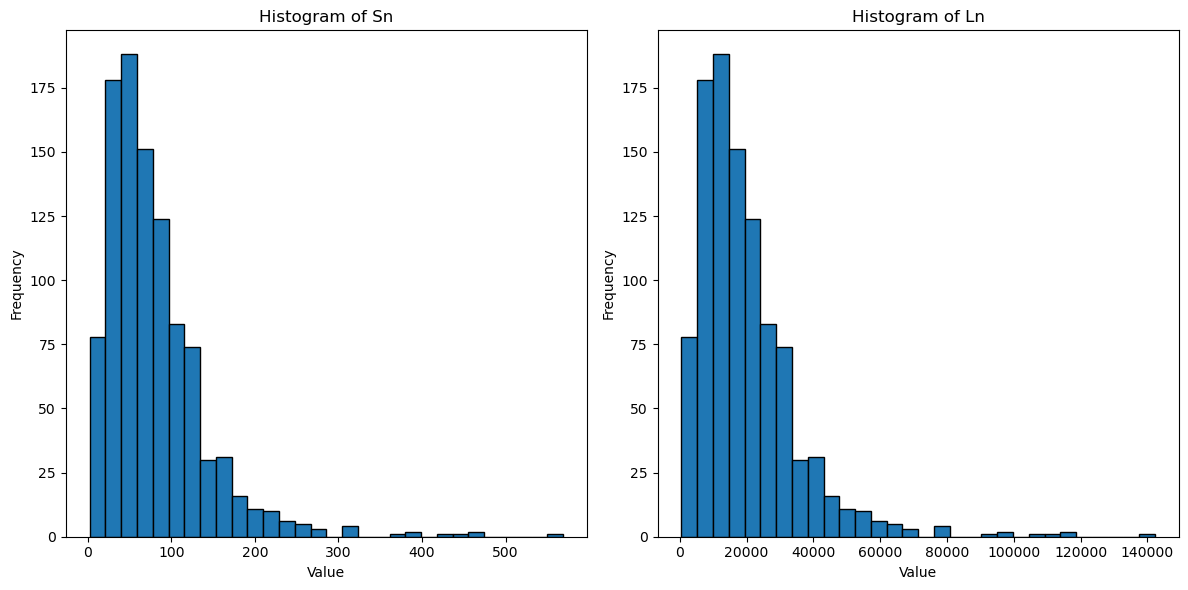

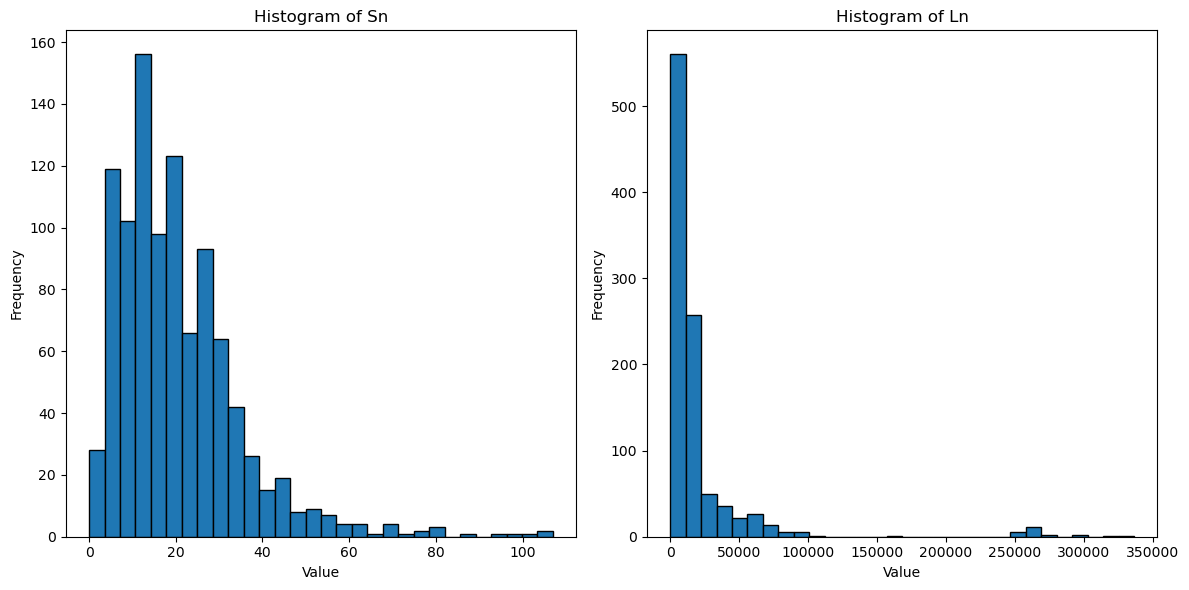

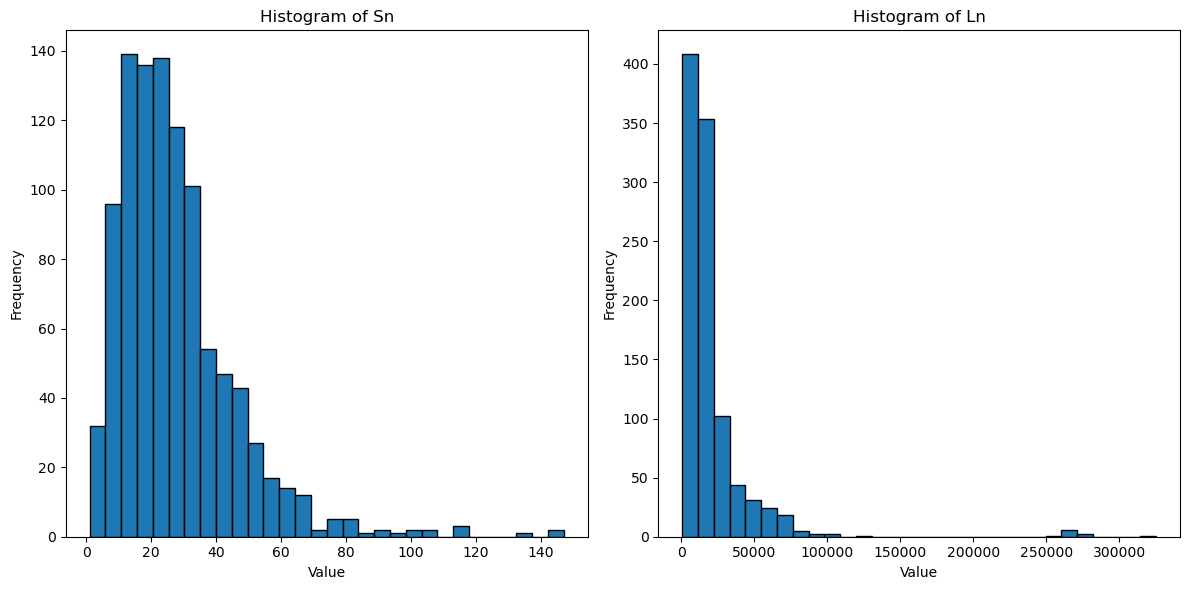

In [200]:
class question3(question2):

    # ------------- Sizin yazdiginiz kisim -------------
    def calculate_PD_second_step(self, X1):
        length = len(X1)
        Q = [[calculate_q(0.001) for _ in range(length)] for _ in range(length)]
        X2 = np.copy(X1)

        for i in range(length):
            X2[i] = 1 - np.prod([1 - X1[j] * Q[j][i] for j in range(length) if i != j])
        #default_second_step =  1 - product_term
        return X2
    
    def calculate_default(self, X1, X2):
        length = len(X1)
        default = np.copy(X1)
        for i in range(length):
            default[i] = X1[i] + (1 - X1[i]) * X2[i]
        return default

    # ------------- Sizin yazdiginiz kisim -------------
    
    def run(self, EAD:np.ndarray, LGD:float, PD, run_index): 
        # Step 1 
        x1_array = None 
        if type(PD) == float: 
            x1_array = self.calculate_pd(PD, Y=self.Y[run_index])
        else: 
            x1_array = np.array([self.calculate_pd(i, Y=self.Y[run_index]) for i in PD])
    
        # Step 2 
        x2_array = self.calculate_PD_second_step(x1_array)

        # Step 3 
        x_array = self.calculate_default()


        Sn = x_array.sum()        
        Ln = np.sum(EAD * LGD * x_array)
        return Sn, Ln 


def run_q3(): 
    q2 = question3()

    print("ABN AMOR")
    EAD = np.ones(8000) * 1000
    LGD = 0.25 
    PD = np.ones(8000) * 0.01 

    q2.all_in_one(EAD, LGD, PD)
    print()


    print("NSN BANK")
    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = np.ones(1017) * 0.02

    q2.all_in_one(EAD, LGD, PD)
    print()
    
    """
    print("ROBA BANK")
    EAD = np.array([1000] * 1000 + [10000] * 10 + [50000] * 4 + [100000] * 2 + [500000] * 1)
    LGD = 0.5 
    PD = np.array([0.0275] * 1000 + [0.02] * 10 + [0.0175] * 4 + [0.015] * 2 + [0.008] * 1)

    q2.all_in_one(EAD, LGD, PD)
    print()
    """
run_q2()

'\ndef run_q3():\n\n    def _init_(self):\n        self.Y = stats.norm(loc=0, scale=1).rvs(1)\n\n    q3 = question2()\n\n    def calculate_PD_first_step():\n        print("ABN AMOR")\n        PD = 0.01\n        pd_abn = q3.calculate_pd(PD)\n        xArrayABN = np.array(list(map(calculate_x, np.ones(8000) * pd_abn)))\n        print(f"Default first step for ABN AMOR: {sum(xArrayABN)/8000}")\n\n        print("NSN BANK")\n        PD = 0.02\n        pd_nsn = q3.calculate_pd(PD)\n        xArrayNSN = np.array(list(map(calculate_x, np.ones(1017) * pd_nsn)))\n        print(f"Default first step for NSN BANK: {sum(xArrayNSN)/1017}")\n\n        print("ROBA BANK")\n        PD = np.array([0.0275] * 1000 + [0.02] * 10 + [0.0175] * 4 + [0.015] * 2 + [0.008] * 1)\n        pd_roba = q3.calculate_pd(PD)\n        xArrayROBA = np.array(list(map(calculate_x, np.ones(1017) * pd_roba)))\n        print(f"Default first step for ROBA BANK: {sum(xArrayROBA)/1017}")\n\n        return xArrayABN, xArrayNSN, xArrayRO